In [1]:
import glacierml as gl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)


In [2]:
df = gl.load_notebook_data(
    parameterization = '4',
    pth = '/data/fast1/glacierml/data/'
)
df['STD'] = np.sqrt(df['Model Variance'])
df

,RGIId,Mean Thickness,Median Thickness,Thickness Std Dev,Weighted Mean Thickness,Model Variance,Weighted Volume (km3),Lower Bound,Upper Bound,Shapiro-Wilk statistic,Shapiro-Wilk p_value,IQR,Total estimates,region,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Farinotti Mean Thickness,Farinotti Shapiro-Wilk statistic,Farinotti Shapiro-Wilk p_value,Farinotti Median Thickness,Farinotti Thickness STD,Farinotti Skew,Farinotti Volume (km3),STD
0,RGI60-01.00001,42.329164,40.829075,17.774538,42.138140,315.855710,0.015170,17.147953,17.373271,0.977839,1.403818e-24,22.393699,4025.0,01,63.6890,-146.8230,42.0,1936,2385,2725,0.360,346,839,19.988910,0.953100,1.411381e-12,22.598288,1.490189,-0.404481,0.007196,17.772330
1,RGI60-01.00002,65.017496,64.454840,12.893505,64.880835,166.201159,0.036204,12.887889,12.357560,0.991609,1.124679e-14,16.607787,4025.0,01,63.4040,-146.6680,16.0,1713,2005,2144,0.558,162,1197,29.413269,0.980514,1.595224e-09,31.332405,3.074196,0.050484,0.016413,12.891903
2,RGI60-01.00003,64.667035,63.936592,13.213099,64.525903,174.542609,0.108726,13.328799,12.734466,0.990523,9.140342e-16,17.279204,4025.0,01,63.3760,-146.0800,18.0,1609,1868,2182,1.685,175,2106,31.862368,0.944144,9.216613e-31,35.054910,2.878639,-0.390670,0.053688,13.211457
3,RGI60-01.00004,70.265613,69.803030,13.985704,70.122679,195.551333,0.258122,13.597262,13.528553,0.993317,9.460808e-13,17.838818,4025.0,01,63.3810,-146.1200,19.0,1273,1944,2317,3.681,195,4175,45.454704,0.969001,8.057077e-34,45.209550,6.697096,0.072549,0.167319,13.983967
4,RGI60-01.00005,70.848847,70.529550,13.393655,70.714173,179.345434,0.181948,12.459778,12.795742,0.994704,6.132984e-11,16.795218,4025.0,01,63.5510,-147.0570,16.0,1494,1914,2317,2.573,181,2981,43.040817,0.977176,3.500081e-25,43.682045,6.024213,0.328906,0.110744,13.391991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216496,RGI60-19.02748,35.898377,35.064503,9.786620,35.837315,95.754135,0.001505,9.634791,10.937230,0.991746,1.570463e-14,13.292896,4025.0,19,-53.9860,-37.7325,29.9,310,-999,510,0.042,315,255,12.593311,0.923319,4.533989e-04,13.539223,1.212544,-1.011952,0.000529,9.785404
216497,RGI60-19.02749,45.766667,46.015816,6.605012,45.730012,43.615348,0.025929,6.097812,6.066629,0.987531,2.209954e-18,7.905736,4025.0,19,-54.8310,-36.1361,23.6,330,-999,830,0.567,200,1130,20.532068,0.972606,4.733442e-12,19.437310,2.341599,0.356173,0.011642,6.604192
216498,RGI60-19.02750,68.989277,70.057810,7.536086,68.973614,56.778488,0.284033,5.158428,6.256616,0.915216,8.491869e-43,7.364870,4025.0,19,-54.1884,-37.3018,16.8,10,-999,1110,4.118,308,4329,55.923466,0.977032,2.709829e-31,58.010944,9.158872,0.279736,0.230293,7.535150
216499,RGI60-19.02751,105.089902,108.702805,14.895259,105.109750,221.813622,0.001156,6.881977,9.885330,0.719739,0.000000e+00,10.367695,4025.0,19,-68.8656,-90.4266,0.4,170,-999,270,0.011,122,106,10.181019,0.954263,5.273163e-01,10.175133,0.199121,0.277144,0.000112,14.893409


In [3]:
df['VolSTD'] = df['Area'] * (df['STD'] / 1e3)

df['VolUnc'] = df['VolSTD'] / df['Weighted Volume (km3)'] * 100

glac_sum = np.round(sum(df['Weighted Volume (km3)']) / 1e3, 3)

glac_sum_unc = np.round(np.sqrt(
    sum(df['VolSTD']**(2))
) / 1e3, 3)

perc = np.round(glac_sum_unc / glac_sum * 100, 3)

print(
    f'Sum thickness: {glac_sum} +/- {glac_sum_unc} * 10^3 km^3, '
    f'{perc}% uncertainty'
)

Sum thickness: 132.59 +/- 1.899 * 10^3 km^3, 1.432% uncertainty


# Compare with survey thickness

In [4]:
glac = gl.load_training_data(RGI_input = 'y')
glac = glac[['RGIId', 'Thickness']]

df = pd.merge(df, glac, on = 'RGIId', how = 'inner')

df['Residual'] = df['Weighted Mean Thickness'] - df['Thickness']
df['F Residual'] = df['Farinotti Mean Thickness'] - df['Thickness']

df['P Residual'] = (df['Weighted Mean Thickness'] - df['Thickness']) / df['Thickness']
df['F P Residual'] =(df['Farinotti Mean Thickness'] - df['Thickness']) / df['Thickness']

df

,RGIId,Mean Thickness,Median Thickness,Thickness Std Dev,Weighted Mean Thickness,Model Variance,Weighted Volume (km3),Lower Bound,Upper Bound,Shapiro-Wilk statistic,Shapiro-Wilk p_value,IQR,Total estimates,region,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Farinotti Mean Thickness,Farinotti Shapiro-Wilk statistic,Farinotti Shapiro-Wilk p_value,Farinotti Median Thickness,Farinotti Thickness STD,Farinotti Skew,Farinotti Volume (km3),STD,VolSTD,VolUnc,Thickness,Residual,F Residual,P Residual,F P Residual
0,RGI60-01.00037,209.310266,216.130900,40.039094,209.226895,1602.730750,49.081073,16.951648,26.560071,0.720072,0.000000e+00,28.533290,4025.0,01,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,221.368740,0.894585,0.000000e+00,174.291930,53.527866,0.780877,51.929343,40.034120,9.391324,19.134309,235.0,-25.773105,-13.631260,-0.109673,-0.058005
1,RGI60-01.00570,90.494200,91.317276,15.268613,90.379751,233.072626,1.587701,11.444827,13.472251,0.953788,6.638265e-34,16.051464,4025.0,01,63.281000,-145.427000,14.0,1162,1858,2438,17.567,172,8639,75.656790,0.939484,0.000000e+00,67.445496,18.147484,0.752189,1.329063,15.266716,0.268190,16.891744,147.0,-56.620249,-71.343210,-0.385172,-0.485328
2,RGI60-01.01104,90.167323,91.284256,15.082671,90.060290,227.430434,0.858094,11.012298,13.168568,0.951711,1.636929e-34,16.129360,4025.0,01,58.380000,-134.349000,10.0,676,1123,1494,9.528,327,6332,110.901680,0.944506,0.000000e+00,97.632590,29.573280,0.806189,1.056671,15.080797,0.143690,16.745224,66.0,24.060290,44.901680,0.364550,0.680328
3,RGI60-01.02236,51.709261,50.033535,13.439234,51.557644,180.568133,0.007888,12.636047,12.552256,0.984227,8.476528e-21,16.174629,4025.0,01,69.276000,-143.819000,22.0,2360,2440,2554,0.153,219,680,22.385798,0.970167,4.969998e-05,24.184961,1.360460,-0.282476,0.003425,13.437564,0.002056,26.063185,83.0,-31.442356,-60.614202,-0.378824,-0.730292
4,RGI60-01.02236,51.709261,50.033535,13.439234,51.557644,180.568133,0.007888,12.636047,12.552256,0.984227,8.476528e-21,16.174629,4025.0,01,69.276000,-143.819000,22.0,2360,2440,2554,0.153,219,680,22.385798,0.970167,4.969998e-05,24.184961,1.360460,-0.282476,0.003425,13.437564,0.002056,26.063185,82.0,-30.442356,-59.614202,-0.371248,-0.727002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,RGI60-19.01012,107.371899,110.740060,15.851901,107.393897,251.220338,0.022875,8.407264,11.557920,0.770131,0.000000e+00,12.710630,4025.0,19,-65.052700,-63.393600,0.0,10,-999,50,0.213,-9,318,15.617301,0.989473,1.451944e-02,15.721304,0.932892,0.161842,0.003326,15.849932,0.003376,14.758689,312.0,-204.606103,-296.382699,-0.655789,-0.949945
496,RGI60-19.01950,97.799947,101.289764,12.548057,97.810366,157.414618,0.708147,4.821859,7.778115,0.656968,0.000000e+00,7.245646,4025.0,19,-62.047200,-58.376500,7.4,30,-999,630,7.240,150,5187,398.524960,0.950762,0.000000e+00,347.143980,49.511383,0.124630,2.885321,12.546498,0.090837,12.827371,238.0,-140.189634,160.524960,-0.589032,0.674475
497,RGI60-19.02058,79.080798,81.504220,8.664019,79.081449,75.046582,0.091734,3.921316,5.671141,0.712960,0.000000e+00,5.367575,4025.0,19,-62.675200,-60.390600,10.0,10,-999,370,1.160,260,1118,79.968520,0.769153,2.802597e-45,64.821260,25.859463,2.136447,0.092763,8.662943,0.010049,10.954457,89.0,-9.918551,-9.031480,-0.111444,-0.101477
498,RGI60-19.02059,91.311536,94.843820,10.899248,91.321092,118.764091,0.501627,3.631065,6.074749,0.608096,0.000000e+00,5.354730,4025.0,19,-62.670700,-60.354700,6.7,10,-999,370,5.493,273,3056,224.429600,0.983205,6.195902e-31,224.896590,30.958113,0.355534,1.232792,10.897894,0.059862,11.933600,97.0,-5.678908,127.429600,-0.058545,1.313707


In [5]:
mean_residual = np.round(df['Residual'].mean(), 3)
mean_residual_unc = np.round(df['Residual'].std(), 3)

mean_residual_f = np.round(df['F Residual'].mean(), 3)
mean_residual_f_unc = np.round(df['F Residual'].std(), 3)

print(
    f'This study mean residual: {mean_residual} +/- {mean_residual_unc} m\n'
    f'Farinotti mean residual: {mean_residual_f} +/- {mean_residual_f_unc} m'

)

This study mean residual: -9.679 +/- 49.791 m
Farinotti mean residual: -3.494 +/- 54.105 m


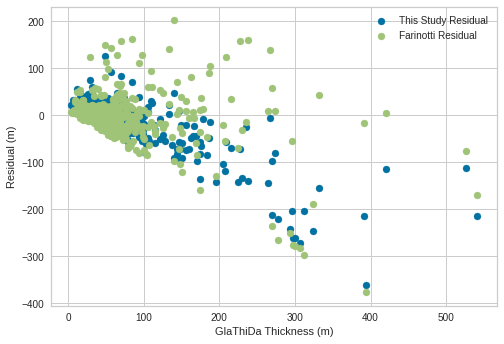

In [6]:
plt.scatter(
    df['Thickness'],
    df['Residual'],
    label = 'This Study Residual'
)
plt.scatter(
    df['Thickness'],
    df['F Residual'],
    label = 'Farinotti Residual'
)

plt.ylabel('Residual (m)')
plt.xlabel('GlaThiDa Thickness (m)')
plt.legend()